# Programming in Python


## 1. Getting to know Python

### Different ways to interact with Python
 1. Using the interpreter (for instance `ipython`)
 2. Using the `jupyter notebook`
 3. Writing and executing programs (`python myProgram.py`)

### Python language elements

 #### Python as a calculator 
   * operations 
   * math functions

In [1]:
import math


#### numbers 
 * integers
 * floats

#### working with strings 
 * single line
 * extending obver several lines
 * converting numbers to string

#### packing things together -- lists and tuples
 * length
 * indexing 
 * slicing

#### accessing values by keys -- dictionaries
 * example

 #### storing data in **variables**
  * setting and retrieving 

 #### printing
  * default print
  * formatted print

 #### **Identation** is part of the language!
   * loops
   * conditionals
   * scoping

#### functions

#### comments

### Common pitfalls
 * watch out for indentation
 * comparing floats may yield unintented consequences
 * integer division (//) vs division (/)
 * in place vs function that return new objects

## 2. Python with batteries charged

### Numpy for fast array operations (Matlab and IDL users pay attention)

$$\frac{\partial f}{\partial t} + u \frac{\partial f}{\partial x} = 0$$
$$f_i^{t + \Delta t} = (1 - C) f_i^t + C f_{i-1}^t$$ with $$C \equiv \frac{u \Delta t}{\Delta x}$$

Up-wind implementation:

`newf[i] = (1 - c)*f[i] + c*f[i - 1]` for $i \in 1...n-1$

`newf[0] = (1 - c)*f[0] + c*f[-1]` (assuming periodic boundary conditions)

In [2]:
import numpy

# code to advance function f starting from initial 
# condition f0
#
def advance(f0, c, nt=10):
    """
    Advance the function 
    f0  initial condition
    c   Courant coefficient
    nt  number of time steps
    """
    pass


n = 1000
f0 = numpy.zeros([n], numpy.float64) # initial condition
f0[0:n//4] = 1.
advance(f0, 0.99, nt=500)


### Pandas for data analysis (R users pay attention)

What the relation between prosperity and latitude?
 * Look at GDP data for a number of cities around the world
 * Get the population and the latitude data for these cities
 * Compute the GDP per capita for each city
 * plot GDP per capita data against the latitude of each city

In [3]:
import pandas 
gdp = pandas.read_csv('http://bit.ly/citiesGDP')

In [4]:
# show the first few rows
gdp.head()

,Rank,City/Urban area,Country,GDP in US$bn 2005
0,1,Tokyo,Japan,1191
1,2,New York,USA,1133
2,3,Los Angeles,USA,639
3,4,Chicago,USA,460
4,5,Paris,France,460


In [5]:
# renaming columns

In [6]:
geo = pandas.read_csv('http://bit.ly/world_cities')

In [7]:
geo.head()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan


In [8]:
geo.drop(['city_ascii','lng','iso2','iso3'],axis=1,inplace=True)

In [38]:
# remove some rows in the datasets
geo.drop([1322, 6442, 574, 6946], axis=0, inplace=True)
geo.shape

(7318, 5)

In [10]:
# check that Portland appears only once

In [11]:
# combine the two tables
# beware that some cities appear multiple times across countries
gdp_per_capita = []
lats = []
city_names = []
countries = []

# iterate over the rows of gdp
for row in gdp.iterrows():
    pass

In [39]:
# align country names
geo.loc[geo.loc[:,'country']=='United States of America','country']='USA'
geo.loc[geo.loc[:,'country']=='United Kingdom','country']='UK'

In [40]:
#merge the data frames on city and country
df=pandas.merge(gdp,geo, left_on=['City/Urban area', 'Country'],right_on=['city','country'])
df.head()

,Rank,City/Urban area,Country,GDP in US$bn 2005,city,lat,pop,country,province
0,1,Tokyo,Japan,1191,Tokyo,35.685017,22006299.5,Japan,Tokyo
1,2,New York,USA,1133,New York,40.749979,13524139.0,USA,New York
2,3,Los Angeles,USA,639,Los Angeles,33.989978,8097410.0,USA,California
3,4,Chicago,USA,460,Chicago,41.829991,5915976.0,USA,Illinois
4,5,Paris,France,460,Paris,48.866693,4957588.5,France,Île-de-France


In [42]:
#Calculate GDP per capita
df['GDPperCap']=df['GDP in US$bn 2005']*1000000000/df['pop']

In [43]:
#Show cities with GDP per capita > 50k
df[df['GDPperCap'] > 50000]

,Rank,City/Urban area,Country,GDP in US$bn 2005,city,lat,pop,country,province,GDPperCap
0,1,Tokyo,Japan,1191,Tokyo,35.685017,22006299.5,Japan,Tokyo,54120.866618
1,2,New York,USA,1133,New York,40.749979,13524139.0,USA,New York,83776.128003
2,3,Los Angeles,USA,639,Los Angeles,33.989978,8097410.0,USA,California,78914.121923
3,4,Chicago,USA,460,Chicago,41.829991,5915976.0,USA,Illinois,77755.555465
4,5,Paris,France,460,Paris,48.866693,4957588.5,France,Île-de-France,92787.047574
5,6,London,UK,452,London,51.499995,7994104.5,UK,Westminster,56541.667675
7,9,Philadelphia,USA,312,Philadelphia,39.999973,3504775.0,USA,Pennsylvania,89021.406510
8,11,Boston,USA,290,Boston,42.329960,2528070.5,USA,Massachusetts,114711.990825
10,16,Atlanta,USA,236,Atlanta,33.830014,2464454.0,USA,Georgia,95761.576398
11,17,Houston,USA,235,Houston,29.819974,4053287.0,USA,Texas,57977.636422


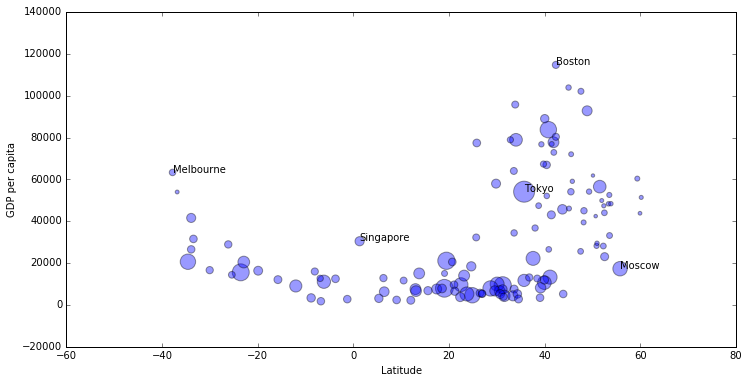

In [60]:
# create scatter plot 
% matplotlib inline
from matplotlib import pylab, pyplot
# nicer plot size
pylab.rcParams['figure.figsize'] = (12, 6)
fig=pyplot.figure()
p=ax = fig.add_subplot(111)
pyplot.scatter(df['lat'],df['GDPperCap'],s=df['pop']/50000,alpha=0.4)
p.annotate('Boston',xy=(df[df['city']=='Boston']['lat'],df[df['city']=='Boston']['GDPperCap']))
p.annotate('Melbourne',xy=(df[df['city']=='Melbourne']['lat'],df[df['city']=='Melbourne']['GDPperCap']))
p.annotate('Tokyo',xy=(df[df['city']=='Tokyo']['lat'],df[df['city']=='Tokyo']['GDPperCap']))
p.annotate('Singapore',xy=(df[df['city']=='Singapore']['lat'],df[df['city']=='Singapore']['GDPperCap']))
p.annotate('Moscow',xy=(df[df['city']=='Moscow']['lat'],df[df['city']=='Moscow']['GDPperCap']))
p.set_xlabel('Latitude')
p.set_ylabel('GDP per capita')
pyplot.show()

